In [76]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)


### Playing around with using different columns that are complete

In [77]:
# train = pd.read_csv('../data/clean_train_all_cols_chase.csv', parse_dates=['timestamp'], index_col="id")  
test = pd.read_csv('../data/clean_test_all_cols_chase.csv', parse_dates=['timestamp'], index_col="id")
# locales = pd.read_csv('../data/okurg_chase.csv')
districts = pd.read_csv('../data/district_indices.csv')
# raw = pd.read_csv('../../data/train.csv',parse_dates=['timestamp'])

In [81]:
test.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [22]:
# # get the cols that in both
# tr_cols = train.columns.tolist()
# te_cols = test.columns.tolist()
# cols = set(tr_cols).intersection(te_cols)

In [23]:
# train = train[train.timestamp>'2013-01-01']

In [24]:
# train_index = train.index.tolist()
# test_index = test.index.tolist()

# cols = ['life_sq','full_sq','floor','max_floor','kitch_sq','product_type',
#         'sub_area','kremlin_km','price_doc','timestamp']

# test['price_doc'] = np.nan

# df = pd.concat([train[cols].copy(),
#                 test[cols].copy()],
#                ignore_index=False)

# df['month'] = df.timestamp.dt.month.astype(object)

In [65]:
districts.head()

,okurg_district,month_year,price,date,nominal_index
0,central,Aug-11,214349.2537,8/1/11,1.000000
1,central,Sep-11,225971.8550,9/1/11,1.054223
2,central,Oct-11,235573.1343,10/1/11,1.099015
3,central,Nov-11,224371.6418,11/1/11,1.046757
4,central,Dec-11,224607.4627,12/1/11,1.047857


In [78]:
# df = test[['timestamp','full_sq','okurg_district']]
test['month_year'] = pd.PeriodIndex(test['timestamp'], freq='M').strftime('%m/%y')
districts['month_year'] = pd.PeriodIndex(districts['date'], freq='M').strftime('%m/%y')

In [79]:
districts.columns = ['okurg_district', 'month_year', 'price', 'date', 'nominal_index']

In [68]:
df = df[['month_year','okurg_district','full_sq']]

In [69]:
df.head()

,month_year,okurg_district,full_sq
id,,,
30474,07/15,southwestern,39.0
30475,07/15,outside,79.2
30476,07/15,eastern,40.5
30477,07/15,outside,62.8
30478,07/15,outside,40.0


In [70]:
# pd.merge(df,districts[['okurg_district','month_year','price']],how="left", on=["okurg_district","month_year"])

In [71]:
temp = districts[['okurg_district','month_year','price']]

In [72]:
def get_price(x):
    return districts.loc[(districts.okurg_district==x[1]) & (districts.month_year==x[0]),'price']

In [73]:
temp.head()

,okurg_district,month_year,price
0,central,08/11,214349.2537
1,central,09/11,225971.8550
2,central,10/11,235573.1343
3,central,11/11,224371.6418
4,central,12/11,224607.4627


In [84]:
test = test.merge(temp,how="left",on=['okurg_district','month_year']).set_index(test.index)

In [85]:
test['price_doc'] = test.full_sq * test.price

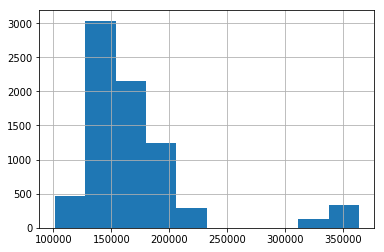

In [86]:
test.price.hist()
# gold.columns = ['period','month_year','nominal_index']
# macro['month_year'] = pd.PeriodIndex(macro['month_year'], freq='M').strftime('%m/%y')
# df['month_year'] = pd.PeriodIndex(df['timestamp'], freq='M').strftime('%m/%y')

# df = pd.merge(df,gold[['month_year','nominal_index','period']], how="left", on="month_year").reset_index(drop=True).set_index(df.index)

In [88]:
#kaggle 0.49046
test['price_doc'].to_frame().to_csv('../submissions/simple_indices.csv')